# Task A

Homa Priya Tarigopula, Mouhammad Abu Rasheed and Frederik Rogge

### Getting started

First, the dataset is created. Note that later y will be used for the label while here it refers to the actual y values of the Franke function.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

from models import *
from utils import *

# Create data
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)

# Compute z
z = FrankeFunction(x, y)

# Create features as pairs of (x, y)
features = np.stack([x.ravel(), y.ravel()], axis=1)

# Get labels
labels = z.ravel()

### The Franke function

To get an idea of how the function looks, here is a plot of it.

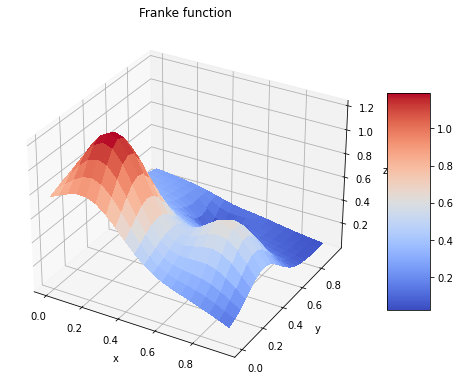

In [2]:
plot_3d(x, y, z, title='Franke function', figsize=(8, 8), name='a_franke_function_groundtruth', save=True)

### Ordinary least squares
#### No noise, no scaling

We first consider the case without added noise and without any scaling or normalization.

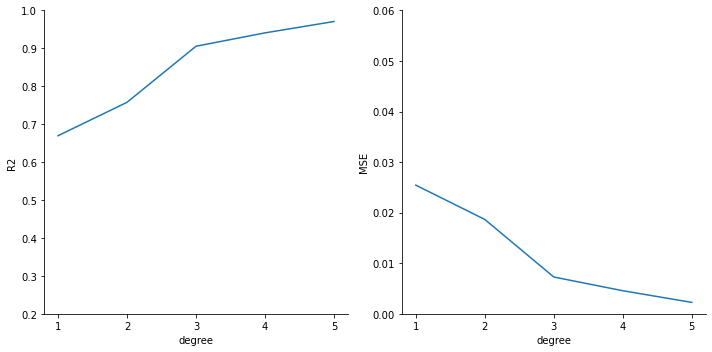

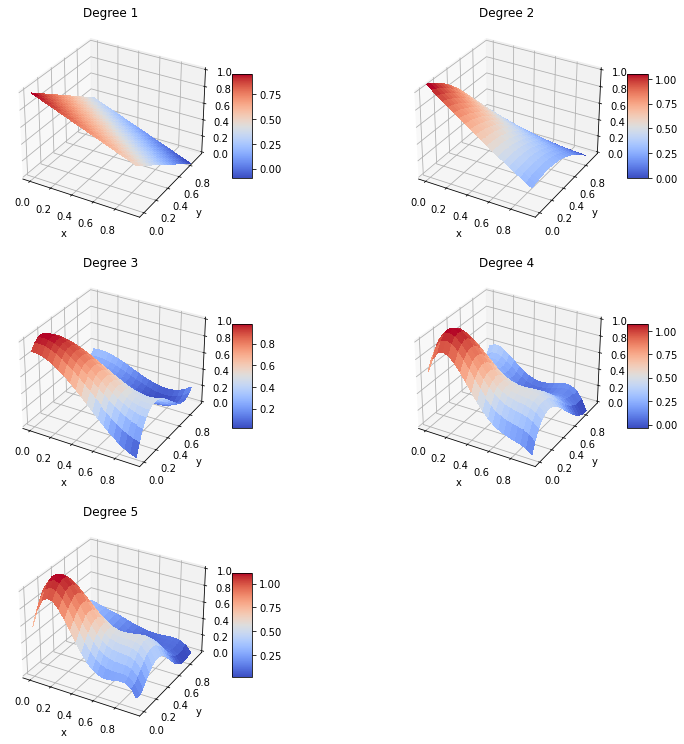

In [19]:
degrees = [1, 2, 3, 4, 5]
include_intercept = True

# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=22)

# Iterate over degrees
mse_losses = []
rs_scores = []
predictions = []
for d in degrees:
    
    # Create polynomial features
    poly = PolynomialFeatures(d, include_bias=include_intercept)
    x_train = poly.fit_transform(X_train)
    x_test = poly.transform(X_test)
    x_pred = poly.transform(features)
    
    # Create model
    model = LinearRegression(fit_intercept=not include_intercept, dimension=x_train.shape[1])
    
    # Fit model using matrix inversion
    model.fit(x_train, y_train)
    
    # Get prediction on test data
    y_hat = model.predict(x_test)
    
    # Get mse loss and R2 score between test prediction and true labels
    mse = MSE(y_test, y_hat)
    r2 = R2(y_test, y_hat)
    
    # Log
    mse_losses.append(mse)
    rs_scores.append(r2)
    predictions.append(model.predict(x_pred).reshape(z.shape))
    
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_metric(y=rs_scores, x=degrees, x_label='degree', y_label='R2', ax=axes[0], y_limit=[0.2, 1])
plot_metric(y=mse_losses, x=degrees, x_label='degree', y_label='MSE', ax=axes[1], y_limit=[0, 0.06])

save_fig(fig, name='a_no-noise_no-scaling')
plt.show()

fig = plt.figure(figsize=(13, 13))
n = len(predictions)
rows = np.ceil(n/2).astype(int)
for i in range(n):
    ax = fig.add_subplot(rows, 2, i+1, projection='3d')
    plot_3d(x, y, predictions[i], title='Degree ' + str(i+1), show=False, figsize=(8, 8), ax=ax, fig=fig, z_limit=[0, 1])
    
save_fig(fig, name='a_pred_no-noise_no-scaling')
#plt.show()

#### Added noise, no scaling

Here, we add noise to the labels drawn from the distribution ~ N(0, 0.1).

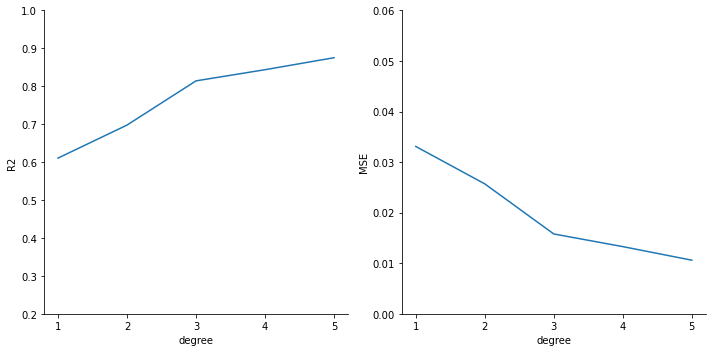

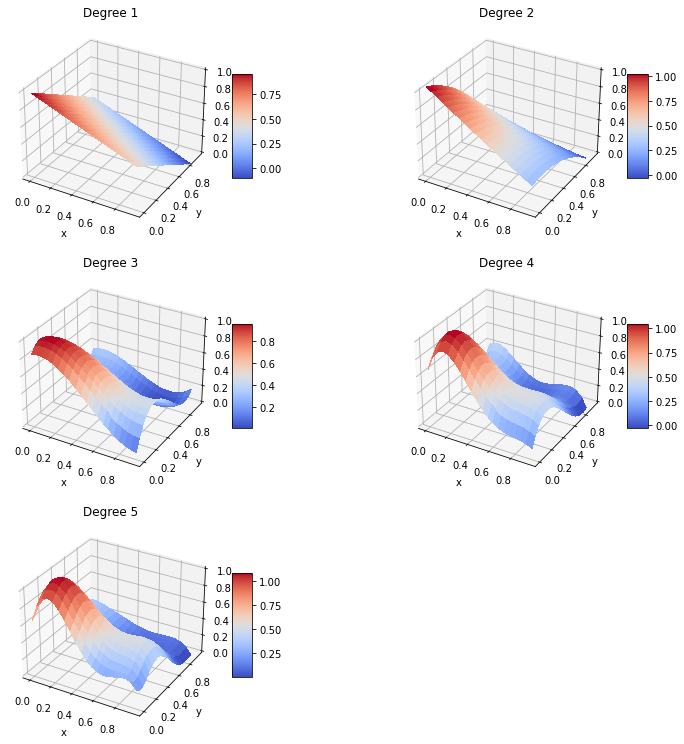

In [18]:
degrees = [1, 2, 3, 4, 5]
include_intercept = True

# Add noise
noisy_labels = labels + np.random.normal(0, 0.1, labels.shape)

# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(features, noisy_labels, test_size=0.2, random_state=22)

# Iterate over degrees
mse_losses = []
rs_scores = []
predictions = []
for d in degrees:
    
    # Create polynomial features
    poly = PolynomialFeatures(d, include_bias=include_intercept)
    x_train = poly.fit_transform(X_train)
    x_test = poly.transform(X_test)
    x_pred = poly.transform(features)
    
    # Create model
    model = LinearRegression(fit_intercept=not include_intercept, dimension=x_train.shape[1])
    
    # Fit model using matrix inversion
    model.fit(x_train, y_train)
    
    # Get prediction on test data
    y_hat = model.predict(x_test)
    
    # Get mse loss and R2 score between test prediction and true labels
    mse = MSE(y_test, y_hat)
    r2 = R2(y_test, y_hat)
    
    # Log
    mse_losses.append(mse)
    rs_scores.append(r2)
    predictions.append(model.predict(x_pred).reshape(z.shape))
    

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_metric(y=rs_scores, x=degrees, x_label='degree', y_label='R2', ax=axes[0], y_limit=[0.2, 1])
plot_metric(y=mse_losses, x=degrees, x_label='degree', y_label='MSE', ax=axes[1], y_limit=[0, 0.06])

save_fig(fig, name='a_noise_no-scaling')
plt.show()

fig = plt.figure(figsize=(13, 13))
n = len(predictions)
rows = np.ceil(n/2).astype(int)
for i in range(n):
    ax = fig.add_subplot(rows, 2, i+1, projection='3d')
    plot_3d(x, y, predictions[i], title='Degree ' + str(i+1), show=False, figsize=(8, 8), ax=ax, fig=fig, z_limit=[0, 1])
    
save_fig(fig, name='a_pred_noise_no-scaling')
#plt.show()

#### No noise, with scaling

In this scenario, we use the standard scaler in order to scale using mean and standard deviation. In contrast to the methods before, we do not include the intercept in the features implicitly as it would result in problems during scaling. Instead, the intercept is calculated later and then set in the model.

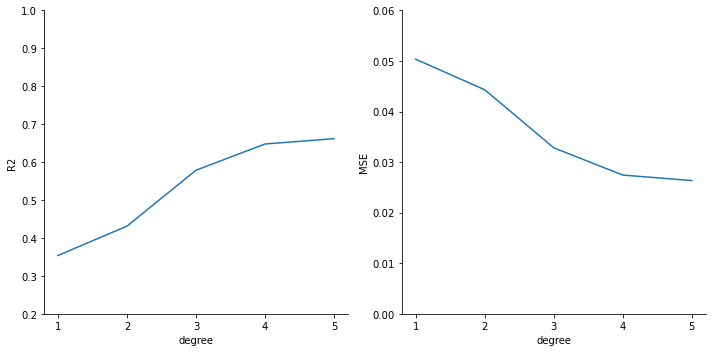

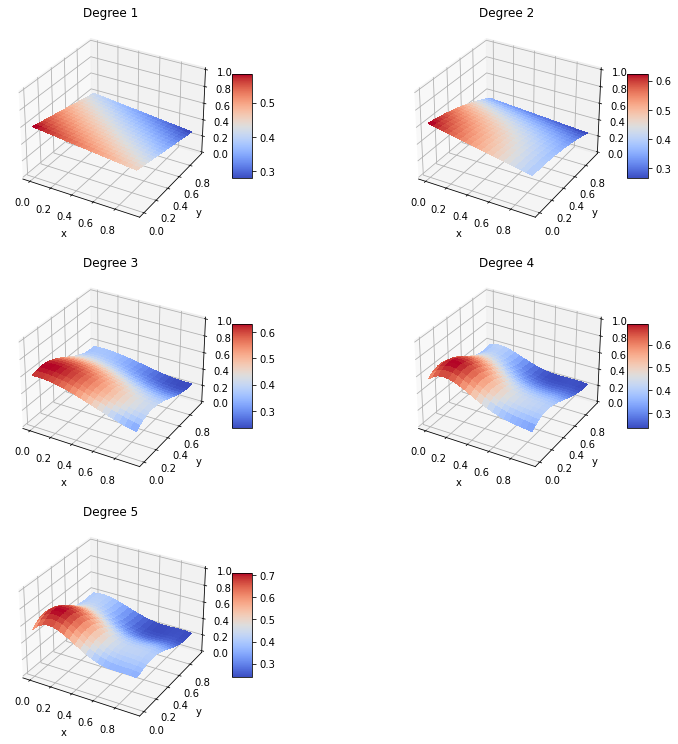

In [16]:
degrees = [1, 2, 3, 4, 5]
include_intercept = False

# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)

# Iterate over degrees
mse_losses = []
rs_scores = []
predictions = []
for d in degrees:
    
    # Create polynomial features
    poly = PolynomialFeatures(d, include_bias=include_intercept)
    x_train = poly.fit_transform(X_train)
    x_test = poly.transform(X_test)
    x_pred = poly.transform(features)
    
    # Scale data
    scaler = StandardScaler(with_std=True)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Create model
    model = LinearRegression(fit_intercept=include_intercept, dimension=x_train.shape[1])
    
    # Fit model using matrix inversion
    model.fit(x_train_scaled, y_train)
    model.set_intercept(x_train, y_train)
    
    # Get prediction on test data
    y_hat = model.predict(x_test)
    
    # Get mse loss and R2 score between test prediction and true labels
    mse = MSE(y_test, y_hat)
    r2 = R2(y_test, y_hat)
    
    # Log
    mse_losses.append(mse)
    rs_scores.append(r2)
    predictions.append(model.predict(x_pred).reshape(z.shape))
    

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_metric(y=rs_scores, x=degrees, x_label='degree', y_label='R2', ax=axes[0], y_limit=[0.2, 1])
plot_metric(y=mse_losses, x=degrees, x_label='degree', y_label='MSE', ax=axes[1], y_limit=[0, 0.06])

save_fig(fig, name='a_no-noise_scaling')
# plt.show()

fig = plt.figure(figsize=(13, 13))
n = len(predictions)
rows = np.ceil(n/2).astype(int)
for i in range(n):
    ax = fig.add_subplot(rows, 2, i+1, projection='3d')
    plot_3d(x, y, predictions[i], title='Degree ' + str(i+1), show=False, figsize=(8, 8), ax=ax, fig=fig, z_limit=[0, 1])
    
save_fig(fig, name='a_pred_no-noise_scaling')
#plt.show()

#### With scaling and with noise

Lastly, we consider the case with noise and with scaling (mean and std).

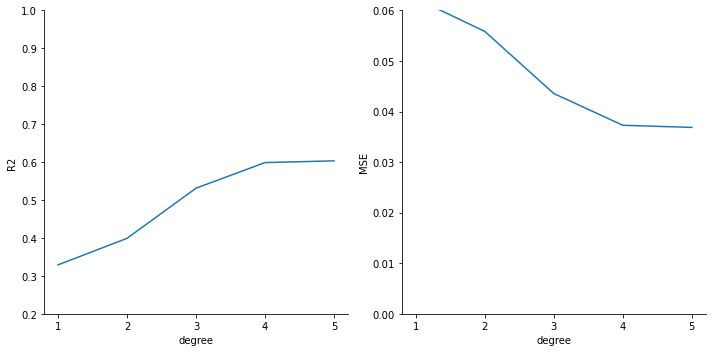

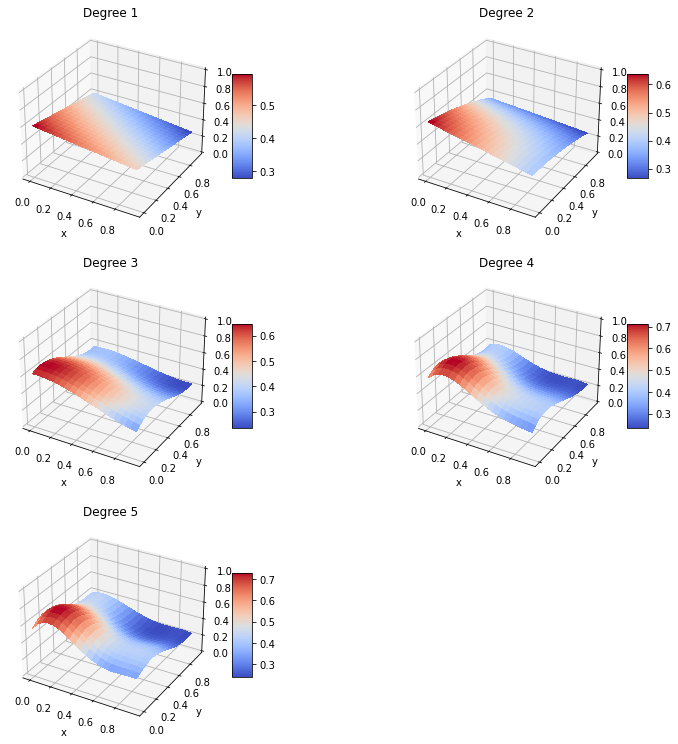

In [20]:
degrees = [1, 2, 3, 4, 5]
include_intercept = False

# Add noise
noisy_labels = labels + np.random.normal(0, 0.1, labels.shape)

# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(features, noisy_labels, test_size=0.2, random_state=20)

# Iterate over degrees
mse_losses = []
rs_scores = []
predictions = []
for d in degrees:
    
    # Create polynomial features
    poly = PolynomialFeatures(d, include_bias=include_intercept)
    x_train = poly.fit_transform(X_train)
    x_test = poly.transform(X_test)
    x_pred = poly.transform(features)
    
    # Scale data
    scaler = StandardScaler(with_std=True)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Create model
    model = LinearRegression(fit_intercept=include_intercept, dimension=x_train.shape[1])
    
    # Fit model using matrix inversion
    model.fit(x_train_scaled, y_train)
    model.set_intercept(x_train, y_train)
    
    # Get prediction on test data
    y_hat = model.predict(x_test)
    
    # Get mse loss and R2 score between test prediction and true labels
    mse = MSE(y_test, y_hat)
    r2 = R2(y_test, y_hat)
    
    # Log
    mse_losses.append(mse)
    rs_scores.append(r2)
    predictions.append(model.predict(x_pred).reshape(z.shape))
    

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_metric(y=rs_scores, x=degrees, x_label='degree', y_label='R2', ax=axes[0], y_limit=[0.2, 1])
plot_metric(y=mse_losses, x=degrees, x_label='degree', y_label='MSE', ax=axes[1], y_limit=[0, 0.06])

save_fig(fig, name='a_noise_scaling')
# plt.show()

fig = plt.figure(figsize=(13, 13))
n = len(predictions)
rows = np.ceil(n/2).astype(int)
for i in range(n):
    ax = fig.add_subplot(rows, 2, i+1, projection='3d')
    plot_3d(x, y, predictions[i], title='Degree ' + str(i+1), show=False, figsize=(8, 8), ax=ax, fig=fig, z_limit=[0, 1])
    
save_fig(fig, name='a_pred_noise_scaling')
#plt.show()